    人生苦短，我用python
# 泰坦尼克数据处理与分析

<img src='https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1502440065892&di=51db15bf76374068735a690806ad66a2&imgtype=0&src=http%3A%2F%2Fwww.pp3.cn%2Fuploads%2F201607%2F20160708007.jpg'>

In [37]:
import pandas as pd

%matplotlib inline

### 导入数据

In [8]:
# 如果不知道函数名是什么，可以只敲击函数前几个，然后按tab键，就会有下拉框提示
titanic = pd.read_csv('train.csv')

### 快速预览

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


| 单词 | 翻译 
| ---: | :--- 
| pclass | 社会阶层(1，精英；2，中层；3，船员/劳苦大众) 
| survived | 是否幸存 
| name | 名字 
| sex | 性别 
| age | 年龄 
| sibsp | 兄弟姐妹配偶个数  sibling spouse
| parch | 父母儿女个数 
| ticket | 船票号 
| fare | 船票价钱 
| cabin | 船舱 
| embarked| 登船口

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
# 把所有数值类型的数据做一个简单的统计
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# 统计None值个数
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 处理空值

In [18]:
# 可以填充整个datafram里边的空值, 可以取消注释，实验一下
# titanic.fillna(0)

# 单独选择一列进行控制填充，可以取消注释，实验一下
# titanic.Age.fillna(0)

# 年龄的中位数
titanic.Age.median()

# 按年龄的中位数去填充，此时是返回一个新的Series
# titanic.Age.fillna(titanic.Age.median())

# 直接填充，并不返回新的Series
titanic.Age.fillna(titanic.Age.median(), inplace=True)

# 再次查看Age的空值
titanic.isnull().sum()

### 尝试从性别进行分析

In [22]:
# 做简单的汇总统计，经常用到
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [34]:
# 生还者中，男女的人数
survived = titanic[titanic.Survived==1].Sex.value_counts()

In [29]:
# 未生还者中，男女的人数
dead = titanic[titanic.Survived==0].Sex.value_counts()

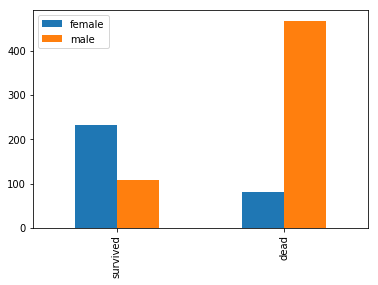

In [45]:
df = pd.DataFrame([survived, dead], index=['survived', 'dead'])
df.plot.bar()

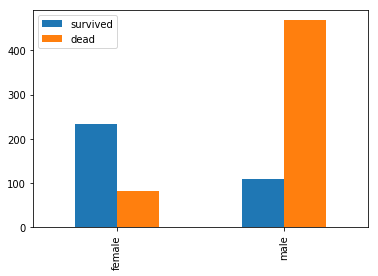

In [46]:
# 绘图成功，但是不是我们想要的效果
# 把dataframe转置一下，就是行列替换
df = df.T
df.plot.bar() # df.plot(kind='bar') 等价的

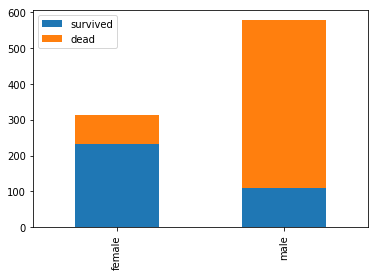

In [48]:
# 仍然不是我们想要的结果
df.plot(kind='bar', stacked=True)

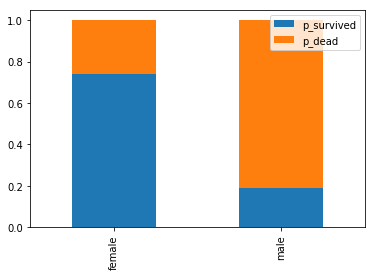

In [58]:
# 男女中生还者的比例情况
df['p_survived'] = df.survived / (df.survived + df.dead)
df['p_dead'] = df.dead / (df.survived + df.dead)
df[['p_survived', 'p_dead']].plot.bar(stacked=True)

通过上面图片可以看出：性别特征对是否生还的影响还是挺大的

### 从年龄进行分析

In [63]:
# 简单统计
# titanic.Age.value_counts()

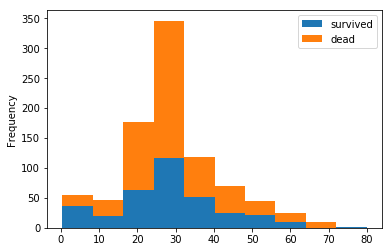

In [71]:
survived = titanic[titanic.Survived==1].Age
dead = titanic[titanic.Survived==0].Age
df = pd.DataFrame([survived, dead], index=['survived', 'dead'])
df = df.T
df.plot.hist(stacked=True)

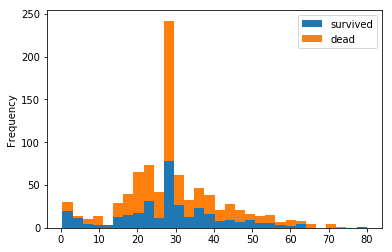

In [73]:
# 直方图柱子显示多一点
df.plot.hist(stacked=True, bins=30)
# 中间很高的柱子，是因为我们把空值都替换为了中位数

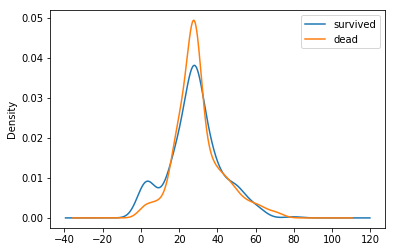

In [74]:
# 密度图, 更直观一点
df.plot.kde()

In [75]:
# 可以查看年龄的分布，来绝对我们图片横轴的取值范围
titanic.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

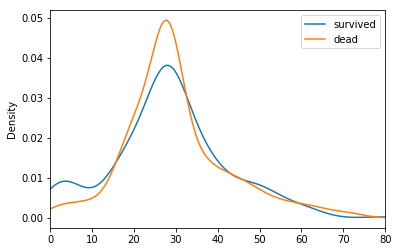

In [77]:
# 限定范围
df.plot.kde(xlim=(0,80))

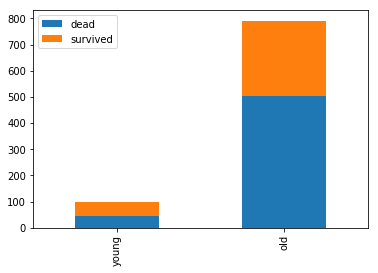

In [96]:
age = 16
young = titanic[titanic.Age<=age]['Survived'].value_counts()
old = titanic[titanic.Age>age]['Survived'].value_counts()
df = pd.DataFrame([young, old], index=['young', 'old'])
df.columns = ['dead', 'survived']
df.plot.bar(stacked=True)

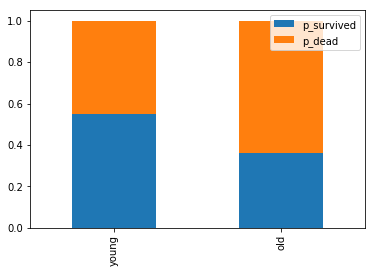

In [97]:
# 男女中生还者的比例情况
df['p_survived'] = df.survived / (df.survived + df.dead)
df['p_dead'] = df.dead / (df.survived + df.dead)
df[['p_survived', 'p_dead']].plot.bar(stacked=True)

### 分析票价

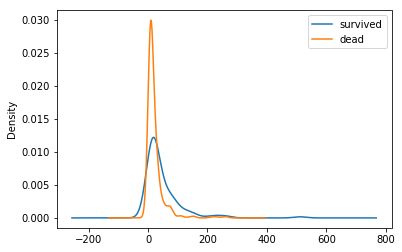

In [105]:
# 票价跟年龄特征相似
survived = titanic[titanic.Survived==1].Fare
dead = titanic[titanic.Survived==0].Fare
df = pd.DataFrame([survived, dead], index=['survived', 'dead'])
df = df.T
df.plot.kde()

In [106]:
# 设定xlim范围，先查看票价的范围
titanic.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

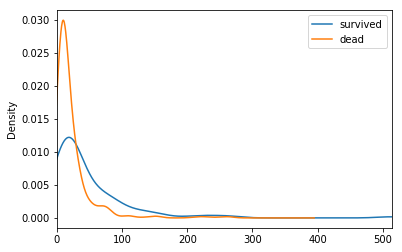

In [107]:
df.plot(kind='kde', xlim=(0,513))

可以看出低票价的人的生还率比较低

### 组合特征

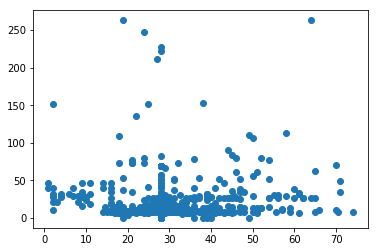

In [111]:
# 比如同时查看年龄和票价对生还率的影响
import matplotlib.pyplot as plt 

plt.scatter(titanic[titanic.Survived==0].Age, titanic[titanic.Survived==0].Fare)

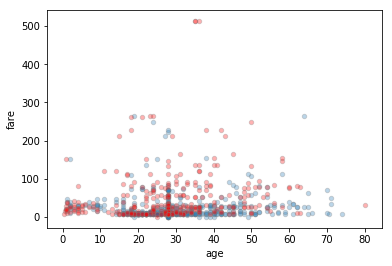

In [138]:
# 不美观
ax = plt.subplot()

# 未生还者
age = titanic[titanic.Survived==0].Age
fare = titanic[titanic.Survived==0].Fare
plt.scatter(age, fare, s=20, marker='o', alpha=0.3, linewidths=1, edgecolors='gray')

# 生还者
age = titanic[titanic.Survived==1].Age
fare = titanic[titanic.Survived==1].Fare
plt.scatter(age, fare, s=20, marker='o', alpha=0.3, linewidths=1, edgecolors='gray', c='red')

ax.set_xlabel('age')
ax.set_ylabel('fare')

### 隐含特征

In [141]:
titanic.Name.describe()

count                                   891
unique                                  891
top       Williams, Mr. Howard Hugh "Harry"
freq                                      1
Name: Name, dtype: object

In [147]:
titanic['title'] = titanic.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [146]:
s = 'Williams, Mr. Howard Hugh "Harry"'
s.split(',')[-1].split('.')[0].strip()

'Mr'

In [149]:
titanic.title.value_counts()
# 比如有一个人被称为 Mr，而年龄是不知道的，这个时候可以用 所有 Mr 的年龄平均值来替代，而不是用我们之前最简单的所有数据的中位数

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Mme               1
Lady              1
Ms                1
Jonkheer          1
Sir               1
Don               1
Capt              1
the Countess      1
Name: title, dtype: int64

### gdp

In [151]:
# 夜光图，简单用灯光图的亮度来模拟gdp

In [152]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [153]:
titanic['family_size'] = titanic.SibSp + titanic.Parch + 1

In [155]:
titanic.family_size.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family_size, dtype: int64

In [156]:
def func(family_size):
    if family_size == 1:
        return 'Singleton'
    if family_size<=4 and family_size>=2:
        return 'SmallFamily'
    if family_size > 4:
        return 'LargeFamily'
    
titanic['family_type'] = titanic.family_size.apply(func)

In [158]:
titanic.family_type.value_counts()

Singleton      537
SmallFamily    292
LargeFamily     62
Name: family_type, dtype: int64